In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importando os dados
df = pd.read_csv('data/Airbnb_Open_Data.csv', low_memory=False)

df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [169]:
# Selecionando as colunas que serão utilizadas
colunas = [
    'NAME',
    'host_identity_verified',
    'neighbourhood group',
    'neighbourhood',
    'lat',
    'long',
    'instant_bookable',
    'room type',
    'cancellation_policy',
    'price',
    'Construction year',
    'service fee',
    'minimum nights',
    'number of reviews',
    'reviews per month',
    'review rate number',
    'calculated host listings count',
    'availability 365',
    'house_rules'
]
df = df[colunas]

In [170]:
# Soma de valores nulos por coluna
print(df.isnull().sum())

NAME                                250
host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
room type                             0
cancellation_policy                  76
price                               247
Construction year                   214
service fee                         273
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131
dtype: int64


In [171]:
# Selecionando as colunas que serão utilizadas
colunas = [
    'NAME',
    'host_identity_verified',
    'neighbourhood group',
    'neighbourhood',
    'lat',
    'long',
    'instant_bookable',
    'room type',
    'cancellation_policy',
    'price',
    'Construction year',
    'service fee',
    'minimum nights',
    'number of reviews',
    'reviews per month',
    'review rate number',
    'calculated host listings count',
    'availability 365',
    'house_rules'
]
df = df[colunas]

In [172]:
# Soma de valores nulos por coluna
print(df.isnull().sum())

NAME                                250
host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
room type                             0
cancellation_policy                  76
price                               247
Construction year                   214
service fee                         273
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131
dtype: int64


In [173]:
# Substituir regras em branco por "No specific rules"
df['house_rules'] = df['house_rules'].fillna('No specific rules')

# Substituir reviews per month NaN por 0
df['reviews per month'] = df['reviews per month'].fillna(0)

# Remover $ e , de service fee e price
df['service fee'] = df['service fee'].str.replace('$', '').str.replace(',', '').astype(float)


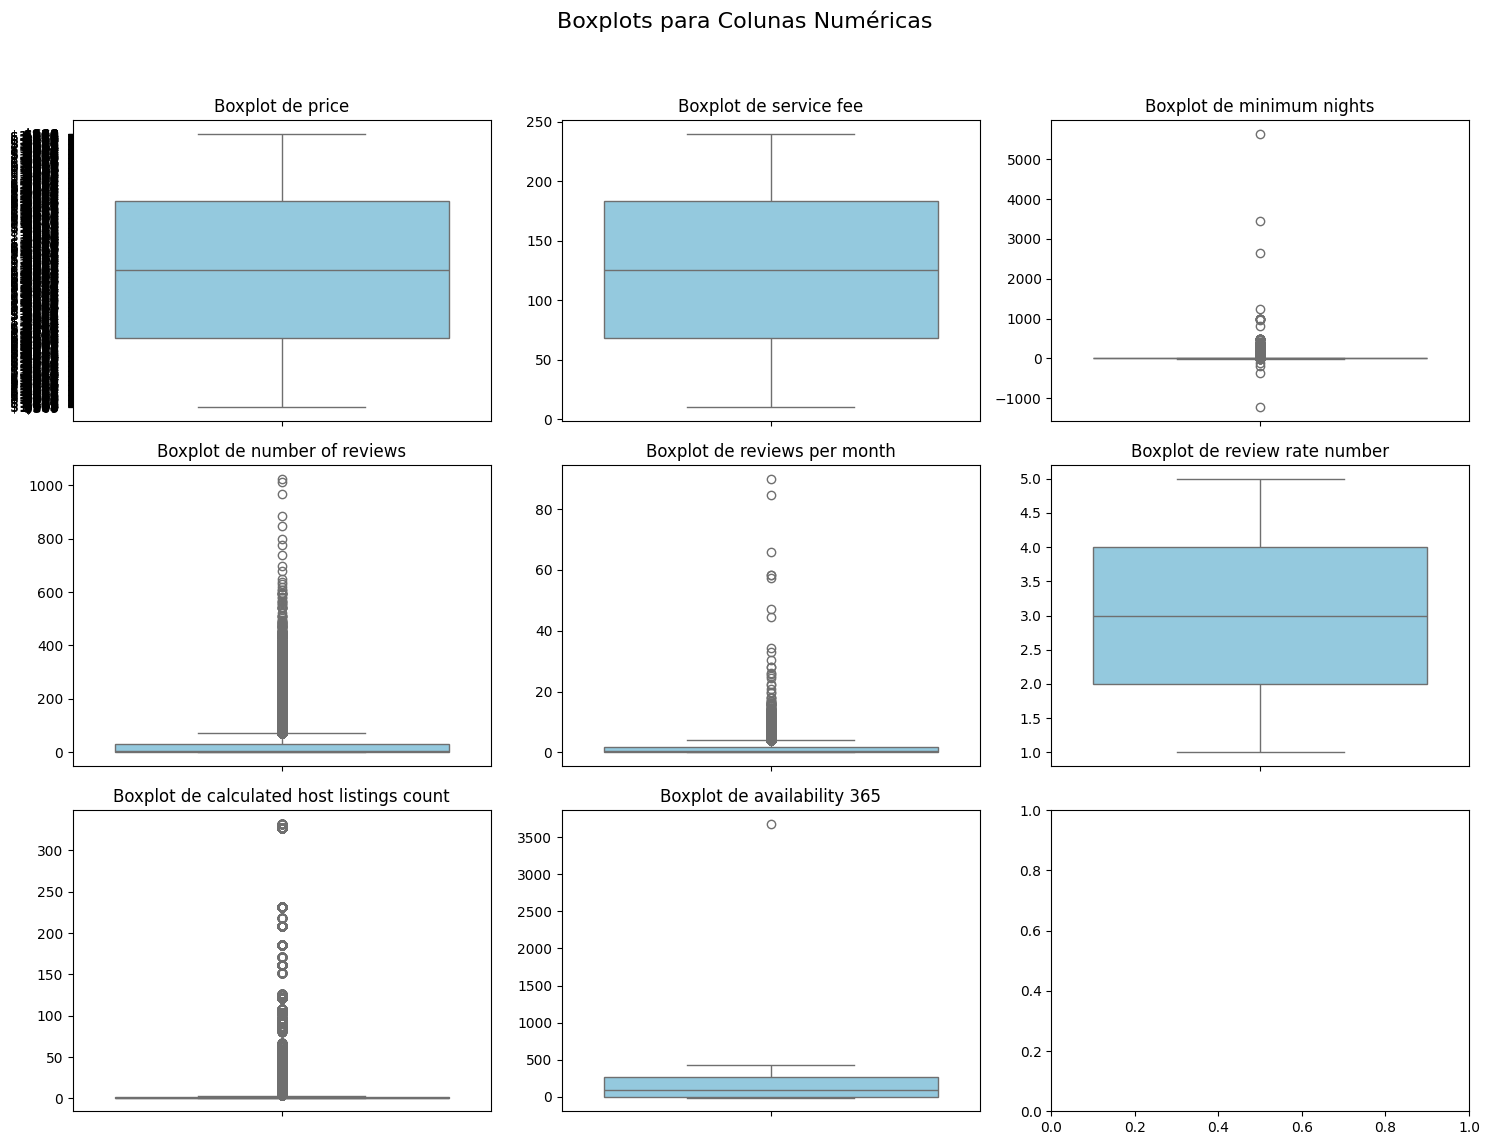

In [174]:
# Fazer boxplot em subplots nas colunas numéricas para verificar outliers
col_boxplot = [
    'price',
    'service fee',
    'minimum nights',
    'number of reviews',
    'reviews per month',
    'review rate number',
    'calculated host listings count',
    'availability 365'
]

# Filtrando as colunas presentes no DataFrame
colunas_presentes = [coluna for coluna in col_boxplot if coluna in df.columns]

# Definindo o número de subplots com base nas colunas presentes
num_subplots = len(colunas_presentes)

# Ajustando o número de linhas e colunas para evitar espremimento
num_linhas = (num_subplots - 1) // 3 + 1
num_colunas = min(num_subplots, 3)

# Criando subplots em uma grade
fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(15, 4 * num_linhas))
fig.suptitle('Boxplots para Colunas Numéricas', fontsize=16)

# Iterando sobre colunas presentes e subplots
for i, coluna in enumerate(colunas_presentes):
    row, col = divmod(i, num_colunas)
    sns.boxplot(y=df[coluna], ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Boxplot de {coluna}')
    axes[row, col].set_ylabel(None)  # Remover rótulo do eixo y para economizar espaço

# Ajustando layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibindo o gráfico
plt.show()

In [175]:
# Remover valores negativos e muito altos de minimum nights
df = df[(df['minimum nights'] > 0) & (df['minimum nights'] < 7)]
df = df[(df['availability 365'] > 0) & (df['availability 365'] < 365)]
df = df[df['calculated host listings count'] < 2]
df = df[df['reviews per month'] < 4]
df = df[df['number of reviews'] < 60]


In [176]:
# Remover valores nulos
colunas_numericas = ['minimum nights', 'availability 365', 'calculated host listings count', 'reviews per month', 'number of reviews']
df = df.dropna(subset=colunas_numericas)

# Converter colunas para int
df[colunas_numericas] = df[colunas_numericas].astype(int)


In [177]:
# Verificar se ainda existem valores nulos após a conversão para int
if df[colunas_numericas].isnull().any().any():
    print("Ainda existem valores nulos nas colunas numéricas após a conversão.")


In [178]:
# Revomer $ e , de price e service fee
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Preencher valores nulos em 'price' e 'service fee' com a média
df['price'].fillna(df['price'].mean(), inplace=True)
df['service fee'].fillna(df['service fee'].mean(), inplace=True)


In [179]:
# Visualizar informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25562 entries, 2 to 102598
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            25507 non-null  object 
 1   host_identity_verified          25492 non-null  object 
 2   neighbourhood group             25558 non-null  object 
 3   neighbourhood                   25558 non-null  object 
 4   lat                             25558 non-null  float64
 5   long                            25558 non-null  float64
 6   instant_bookable                25547 non-null  object 
 7   room type                       25562 non-null  object 
 8   cancellation_policy             25549 non-null  object 
 9   price                           25562 non-null  float64
 10  Construction year               25518 non-null  float64
 11  service fee                     25562 non-null  float64
 12  minimum nights                  2556

In [180]:
# Ver valores únicos de neighbourhood group e neighbourhood
print(df['neighbourhood group'].unique())
print(df['neighbourhood'].unique())  # Sem valores nulos ou inconsistentes

['Manhattan' 'Brooklyn' nan 'Queens' 'Staten Island' 'Bronx']
['Harlem' 'Upper West Side' 'Williamsburg' 'Inwood' 'Flatbush'
 'South Slope' 'Lower East Side' 'Flatlands' 'East Village'
 'Bedford-Stuyvesant' 'Fort Greene' 'Ditmars Steinway' 'Windsor Terrace'
 'Greenwich Village' 'Little Italy' 'Bushwick' 'Greenpoint' 'Boerum Hill'
 'Queens Village' 'Upper East Side' 'Midtown' 'Chelsea' 'SoHo'
 'East Harlem' 'Crown Heights' nan 'Prospect Heights' 'Park Slope'
 'Emerson Hill' 'West Village' "Hell's Kitchen" 'Gramercy' 'Chinatown'
 'Brighton Beach' 'St. Albans' 'Nolita' 'Rego Park' 'Wakefield'
 'Kensington' 'Clinton Hill' 'Prospect-Lefferts Gardens' 'Astoria'
 'Carroll Gardens' 'Long Island City' 'Clifton' 'Washington Heights'
 'Kips Bay' 'Spuyten Duyvil' 'Financial District' 'Vinegar Hill'
 'East New York' 'Battery Park City' 'Sunset Park' 'Two Bridges'
 'Sunnyside' 'Gowanus' 'Flatiron District' 'Brooklyn Heights' 'Arverne'
 'Ridgewood' 'Tottenville' 'Columbia St' 'Mariners Harbor' 'Cobbl

In [181]:
# Remover colunas com valores nulos restantes
df = df.dropna()

# Exibir quantidade de valores nulos após o tratamento final
print(df.isnull().sum())

NAME                              0
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
room type                         0
cancellation_policy               0
price                             0
Construction year                 0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
dtype: int64


In [182]:
# Exportar DataFrame para CSV
df.to_csv('data/Airbnb_Open_Data_Clean.csv', index=False)